# Getting started

Using a provided dataset, create a Linear Regression model and an executive summary write up based on your chosen scenario.

# 1) Your work must: Identify the problem

### Write a high quality problem statement

Problem Statement: A liquor store owner in Iowa is looking to expand to new locations and has hired you to investigate the market data for potential new locations. The business owner is interested in the details of the best model you can fit to the data so that his team can evaluate potential locations for a new storefront.

Describe the goals of your study and criteria for success

Goal: Build models of total sales based on location, price per bottle, total bottles sold. You may find it useful to build models for each county, zip code, or city.
Provide a table of the best performing stores by location type of your choice (city, county, or zip code) and the predictions of your model(s).

Based on your models and the table of data, recommend some general locations to the business owner, taking into account model performance. Validate your model's performance and ability to predict future sales using cross-validation.

Bonus: Recommend targets for volume sold and price per bottle!

# 2) Acquire the data

Obtain the data here -- it's from Iowa.gov, filtered and reduced a bit
There is a further reduced version that is 10% of the version above here

In [1]:
## Importing the packages that are needed for this project

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

# 3) Explore the data

### Import data using the Pandas Library

In [2]:
# Load the data into a DataFrame

file_name = ('/Users/ryangin/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-03/Assets/Iowa_Liquor_sales_sample_10pct.csv')

In [3]:
df = pd.read_csv(file_name)
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


### Perform exploratory analysis methods with visualization and statistical analysis

References: 
week-03/1.4-lab/code/solution-code

In [4]:
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [5]:
# Convert Date column to datetime type
#df['Date'] = pd.to_datetime(df['Date'], format ="%Y/%m/%d")
df['Date'] = pd.to_datetime(df['Date'], format ="%m/%d/%Y")

In [6]:
# Replaces all the $ in the dataset with a space
df_reg = df.replace({'\$': ''}, regex=True)

In [7]:
# Convert columns to float types
df_reg[['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']] = df_reg[['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']].astype(float) 

In [8]:
df_reg.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)              float64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [9]:
df_reg.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000
50%,3722.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000
75%,4378.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000


In [10]:
df_reg.shape

(270955, 18)

In [11]:
df_drop = df_reg.dropna()

In [12]:
df_drop.count()

Date                     269258
Store Number             269258
City                     269258
Zip Code                 269258
County Number            269258
County                   269258
Category                 269258
Category Name            269258
Vendor Number            269258
Item Number              269258
Item Description         269258
Bottle Volume (ml)       269258
State Bottle Cost        269258
State Bottle Retail      269258
Bottles Sold             269258
Sale (Dollars)           269258
Volume Sold (Liters)     269258
Volume Sold (Gallons)    269258
dtype: int64

In [13]:
iowa_sample = df_drop.sample(frac=0.1)

In [14]:
iowa_sample

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
238935,2015-07-27,4794,BURLINGTON,52601,29.0,Des Moines,1032080.0,IMPORTED VODKA,35,34425,Grey Goose Vodka,1750.0,35.42,53.13,2,106.26,3.50,0.92
236139,2015-01-27,4485,SANBORN,51248,71.0,O'Brien,1081200.0,CREAM LIQUEURS,330,80457,Ryan's Cream Liqueur,1000.0,7.23,10.85,3,32.55,3.00,0.79
120268,2016-01-25,5095,CARTER LAKE,51510,78.0,Pottawattamie,1081600.0,WHISKEY LIQUEUR,421,64858,Fireball Cinnamon Whiskey Mini Dispenser,3000.0,29.72,44.58,8,356.64,24.00,6.34
125042,2015-03-10,4167,DUBUQUE,52001,31.0,Dubuque,1012200.0,SCOTCH WHISKIES,55,8827,Lauder's,1000.0,6.14,9.21,12,110.52,12.00,3.17
231563,2015-09-22,2619,WEST DES MOINES,50266,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,115,53211,Paul Masson Vs Brandy Mini,600.0,7.12,10.68,1,10.68,0.60,0.16
205035,2015-12-03,4686,CLINTON,52732,23.0,Clinton,1051010.0,AMERICAN GRAPE BRANDIES,205,52594,E & J Vs Brandy,375.0,3.22,4.83,2,9.66,0.75,0.20
12561,2015-12-01,3443,COUNCIL BLUFFS,51503,78.0,Pottawattamie,1062310.0,SPICED RUM,259,43022,Admiral Nelson Spiced Rum Mini,500.0,3.78,5.67,1,5.67,0.50,0.13
15964,2015-11-30,2538,WATERLOO,50702,7.0,Black Hawk,1032080.0,IMPORTED VODKA,962,36406,Medea Vodka,750.0,18.84,28.26,2,56.52,1.50,0.40
156648,2015-05-27,3825,DES MOINES,50316,77.0,Polk,1031200.0,VODKA FLAVORED,205,40192,New Amsterdam Pineapple,375.0,3.50,5.25,24,126.00,9.00,2.38
56234,2016-03-08,5176,CEDAR RAPIDS,52405,57.0,Linn,1032200.0,IMPORTED VODKA - MISC,260,64572,Ciroc Pineapple,375.0,9.25,13.88,1,13.88,0.38,0.10


In [15]:
iowa_sample.shape

(26926, 18)

In [16]:
iowa_sample.to_csv('Iowa_Liquor_sales_small.csv', index=False)

In [17]:
new_sample = pd.read_csv('Iowa_Liquor_sales_small.csv')

In [18]:
new_sample.shape

(26926, 18)

In [19]:
new_sample

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-07-27,4794,BURLINGTON,52601,29.0,Des Moines,1032080.0,IMPORTED VODKA,35,34425,Grey Goose Vodka,1750.0,35.42,53.13,2,106.26,3.50,0.92
1,2015-01-27,4485,SANBORN,51248,71.0,O'Brien,1081200.0,CREAM LIQUEURS,330,80457,Ryan's Cream Liqueur,1000.0,7.23,10.85,3,32.55,3.00,0.79
2,2016-01-25,5095,CARTER LAKE,51510,78.0,Pottawattamie,1081600.0,WHISKEY LIQUEUR,421,64858,Fireball Cinnamon Whiskey Mini Dispenser,3000.0,29.72,44.58,8,356.64,24.00,6.34
3,2015-03-10,4167,DUBUQUE,52001,31.0,Dubuque,1012200.0,SCOTCH WHISKIES,55,8827,Lauder's,1000.0,6.14,9.21,12,110.52,12.00,3.17
4,2015-09-22,2619,WEST DES MOINES,50266,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,115,53211,Paul Masson Vs Brandy Mini,600.0,7.12,10.68,1,10.68,0.60,0.16
5,2015-12-03,4686,CLINTON,52732,23.0,Clinton,1051010.0,AMERICAN GRAPE BRANDIES,205,52594,E & J Vs Brandy,375.0,3.22,4.83,2,9.66,0.75,0.20
6,2015-12-01,3443,COUNCIL BLUFFS,51503,78.0,Pottawattamie,1062310.0,SPICED RUM,259,43022,Admiral Nelson Spiced Rum Mini,500.0,3.78,5.67,1,5.67,0.50,0.13
7,2015-11-30,2538,WATERLOO,50702,7.0,Black Hawk,1032080.0,IMPORTED VODKA,962,36406,Medea Vodka,750.0,18.84,28.26,2,56.52,1.50,0.40
8,2015-05-27,3825,DES MOINES,50316,77.0,Polk,1031200.0,VODKA FLAVORED,205,40192,New Amsterdam Pineapple,375.0,3.50,5.25,24,126.00,9.00,2.38
9,2016-03-08,5176,CEDAR RAPIDS,52405,57.0,Linn,1032200.0,IMPORTED VODKA - MISC,260,64572,Ciroc Pineapple,375.0,9.25,13.88,1,13.88,0.38,0.10


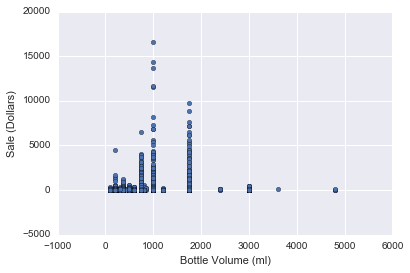

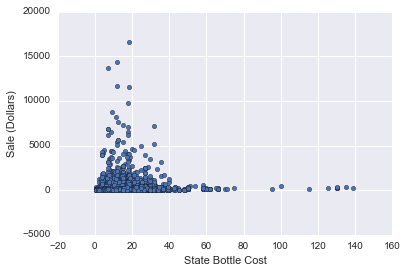

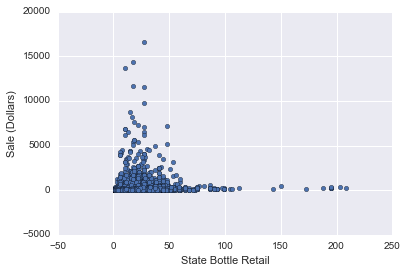

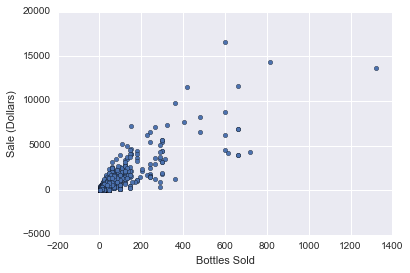

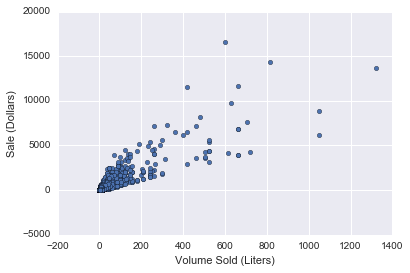

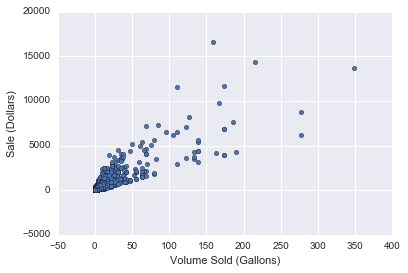

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

# There are many valid solutions.

# For the numerical variables
for column in ["Bottle Volume (ml)", "State Bottle Cost", "State Bottle Retail", "Bottles Sold", "Volume Sold (Liters)", "Volume Sold (Gallons)"]:
    new_sample.plot.scatter(x=column, y="Sale (Dollars)")

In [21]:
total_sales = new_sample['Sale (Dollars)'].groupby([new_sample['County'], new_sample['City'], new_sample['Zip Code'], new_sample['Store Number']]).agg({'Sale (Dollars)':sum})
Top_Sales = total_sales.sort_values(by='Sale (Dollars)', ascending = False)
Top_Sales.head(20)

Sale (Dollars)
County        City            Zip Code Store Number                
Polk          DES MOINES      50320    2633               115013.90
                              50314    4829                94167.27
Johnson       IOWA CITY       52240    2512                72921.68
Linn          CEDAR RAPIDS    52402    3385                61341.33
Polk          WINDSOR HEIGHTS 50311    3420                42084.24
Scott         BETTENDORF      52722    3952                40734.11
Linn          CEDAR RAPIDS    52401    3773                30997.83
Johnson       CORALVILLE      52241    2670                30375.51
Pottawattamie COUNCIL BLUFFS  51501    4312                27155.60
Woodbury      SIOUX CITY      51106    3447                24903.06
Johnson       CORALVILLE      52241    4677                24354.32
Polk          WEST DES MOINES 50265    2648                23812.66
Black Hawk    WATERLOO        50703    2130                22503.00
Carroll       CARROLL         51401    2593                22420.81
Woodbury      SIOUX CITY      51103    3820                21895.04
Dubuque       DUBUQUE         52001    4167                21370.47
Scott         DAVENPORT       52807    3354                20395.50
Linn          MOUNT VERNON    52314    5102                20373.06
Scott         DAVENPORT       52807    2614                19747.04
Dubuque       DUBUQUE         52001    2524                19107.53

In [22]:
Top_counties = pd.pivot_table(new_sample, index = ['County'], values = ['Sale (Dollars)'], aggfunc = sum)

In [23]:
Top10_Sales_County = Top_counties
Top10_Sales_by_County = Top10_Sales_County.sort('Sale (Dollars)', ascending = False).head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


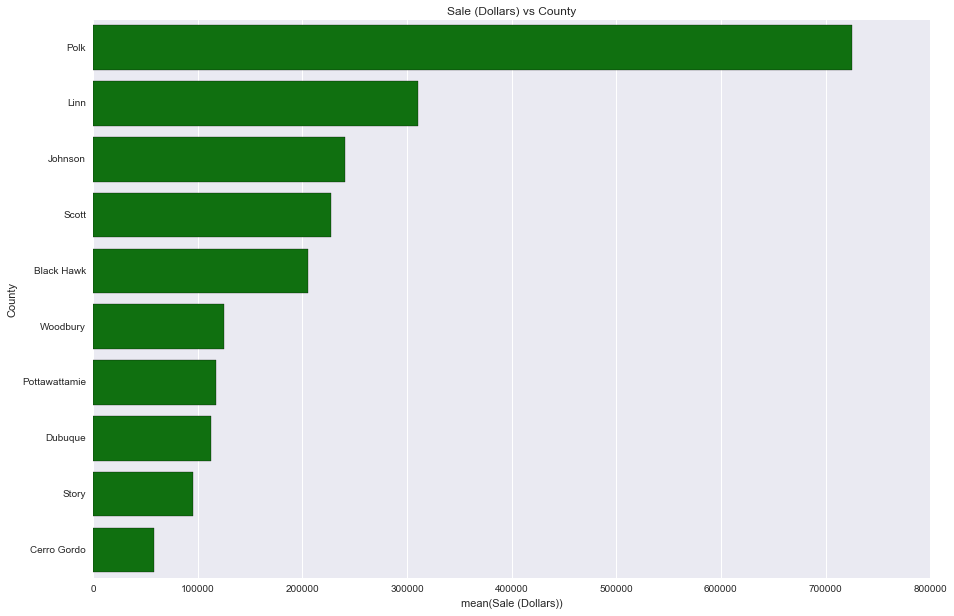

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(y=Top10_Sales_by_County.index, x=Top10_Sales_by_County['Sale (Dollars)'], color='g')\
.set_title('Sale (Dollars) vs County')

In [25]:
Top_cities = pd.pivot_table(new_sample, index = ['City'], values = ['Sale (Dollars)'], aggfunc = sum)

In [26]:
Top20_Sales_City = Top_cities
Top20_Sales_by_City = Top20_Sales_City.sort('Sale (Dollars)', ascending = False).head(20)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


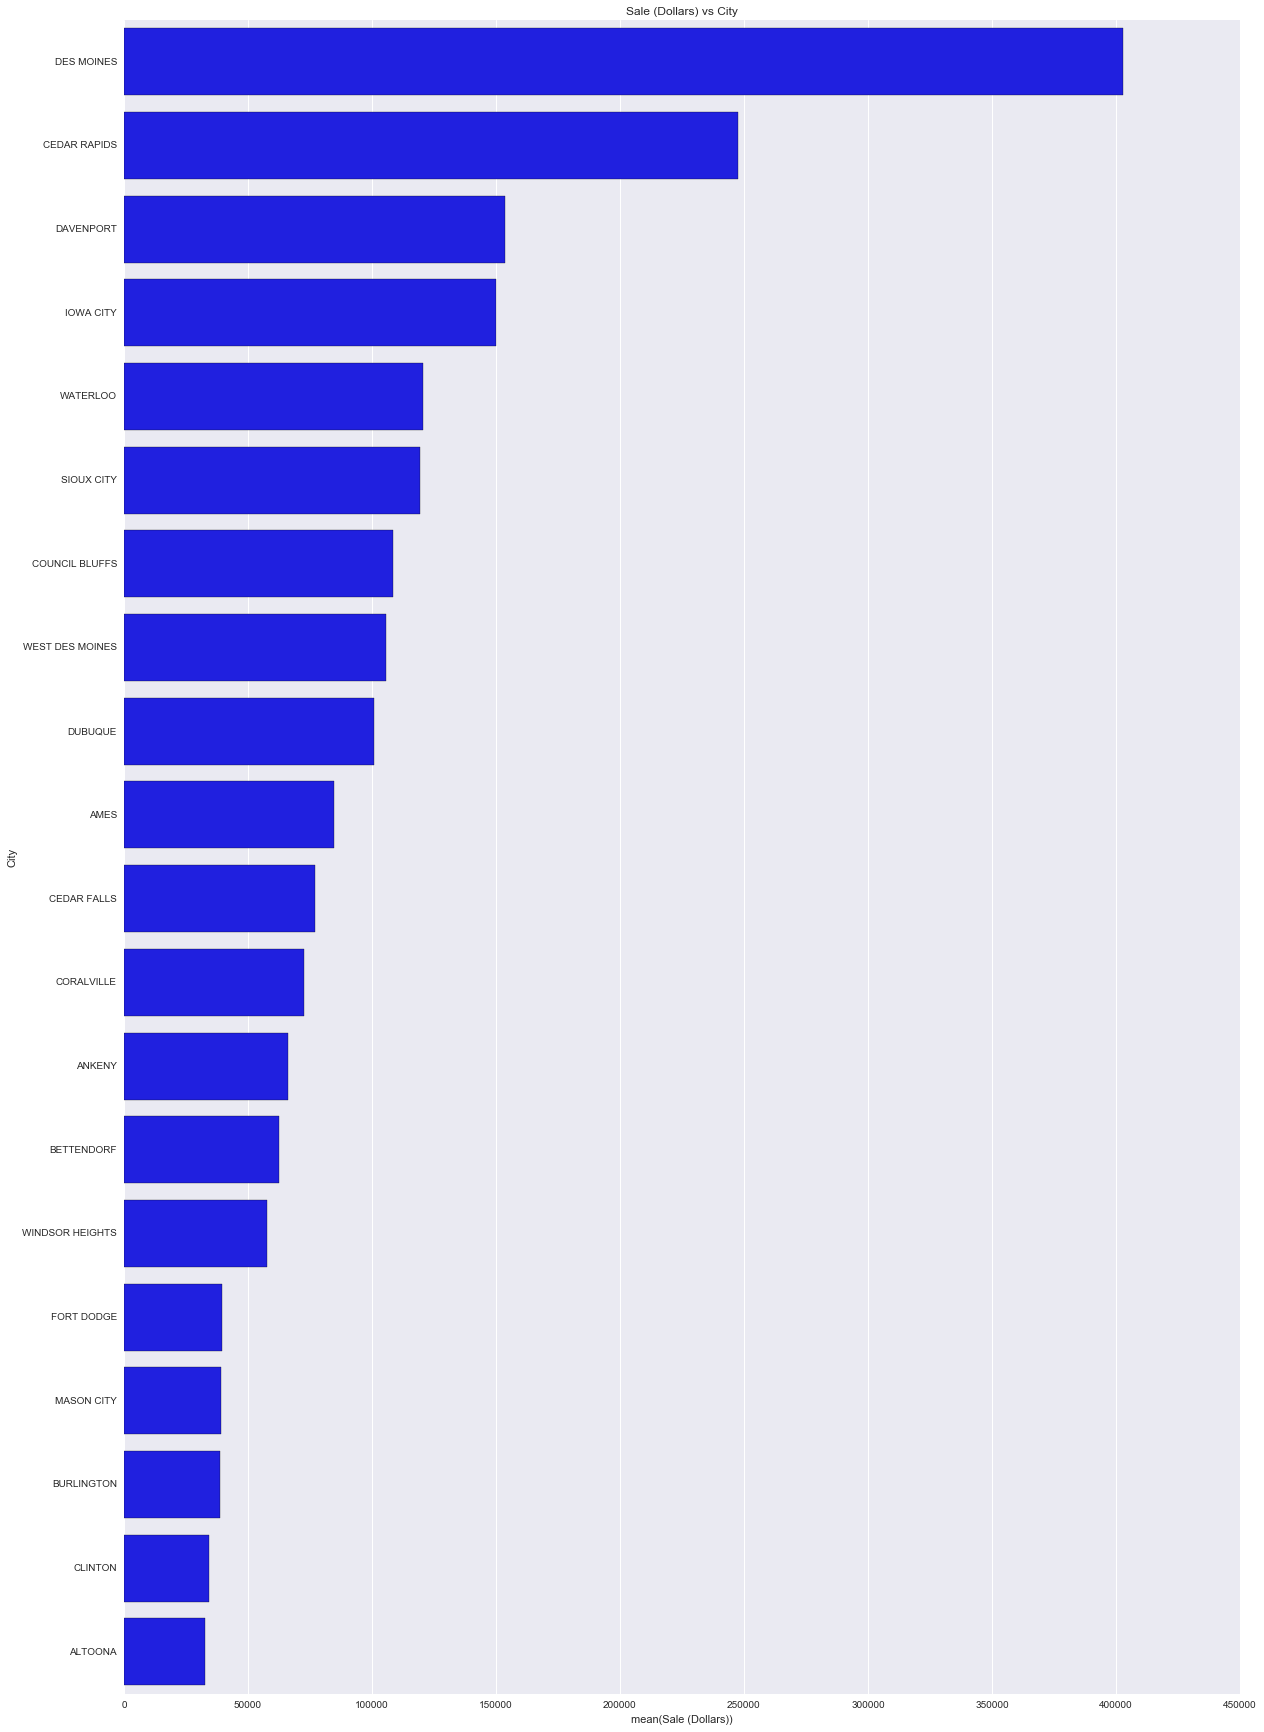

In [27]:
plt.figure(figsize=(20,30))
sns.barplot(y=Top20_Sales_by_City.index, x=Top20_Sales_by_City['Sale (Dollars)'], color='b')\
.set_title('Sale (Dollars) vs City')

### State the risks and assumptions of your data (Outside considerations that could skew or affect the data and make it not reliable)

There are many risks and assumptions that could affect or contribute to making this data unreliable. For example, I removed all the rows with NaN values in them assuming that they were not relevant, but by doing so, I reduced the original dataset. Another thing that I did was that I took a 10% sample of the dataset in order to better work with it. This could skew the data in any direction, meaning that some counties would appear higher although they might not be in the original dataset.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

### Create necessary derived columns from the data (i.e. creating new metrics like bottle per month, finding relationships between columns, daily average user/bottles per person/bottle per store)

In [28]:
# Remove redundant columns
del new_sample["Category Name"]
del new_sample["Item Number"]
del new_sample["County Number"]

In [29]:
new_sample

,Date,Store Number,City,Zip Code,County,Category,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-07-27,4794,BURLINGTON,52601,Des Moines,1032080.0,35,Grey Goose Vodka,1750.0,35.42,53.13,2,106.26,3.50,0.92
1,2015-01-27,4485,SANBORN,51248,O'Brien,1081200.0,330,Ryan's Cream Liqueur,1000.0,7.23,10.85,3,32.55,3.00,0.79
2,2016-01-25,5095,CARTER LAKE,51510,Pottawattamie,1081600.0,421,Fireball Cinnamon Whiskey Mini Dispenser,3000.0,29.72,44.58,8,356.64,24.00,6.34
3,2015-03-10,4167,DUBUQUE,52001,Dubuque,1012200.0,55,Lauder's,1000.0,6.14,9.21,12,110.52,12.00,3.17
4,2015-09-22,2619,WEST DES MOINES,50266,Polk,1051010.0,115,Paul Masson Vs Brandy Mini,600.0,7.12,10.68,1,10.68,0.60,0.16
5,2015-12-03,4686,CLINTON,52732,Clinton,1051010.0,205,E & J Vs Brandy,375.0,3.22,4.83,2,9.66,0.75,0.20
6,2015-12-01,3443,COUNCIL BLUFFS,51503,Pottawattamie,1062310.0,259,Admiral Nelson Spiced Rum Mini,500.0,3.78,5.67,1,5.67,0.50,0.13
7,2015-11-30,2538,WATERLOO,50702,Black Hawk,1032080.0,962,Medea Vodka,750.0,18.84,28.26,2,56.52,1.50,0.40
8,2015-05-27,3825,DES MOINES,50316,Polk,1031200.0,205,New Amsterdam Pineapple,375.0,3.50,5.25,24,126.00,9.00,2.38
9,2016-03-08,5176,CEDAR RAPIDS,52405,Linn,1032200.0,260,Ciroc Pineapple,375.0,9.25,13.88,1,13.88,0.38,0.10


### Format, clean, slice, and combine the data in Python (Put everything together)

Note: Most of the cleaning was done previously in the Explore the Data section under "Perform exploratory analysis and visualizations"

In [30]:
new_sample.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County                    object
Category                 float64
Vendor Number              int64
Item Description          object
Bottle Volume (ml)       float64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [31]:
new_sample['Date'] = pd.to_datetime(new_sample['Date'], format ="%Y/%m/%d")

In [32]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = new_sample.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates.head()

# Filter out stores that opened or closed throughout the year
# You may want to save this step until you start modelling
lower_cutoff = pd.Timestamp("20150101")
upper_cutoff = pd.Timestamp("20151231")
mask = (dates['Date amin'] >= lower_cutoff) & (dates['Date amax'] <= upper_cutoff)
good_stores = dates[mask]["Store Number"]
new_sample1 = new_sample[new_sample["Store Number"].isin(good_stores)]

In [33]:
new_sample1

,Date,Store Number,City,Zip Code,County,Category,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
5,2015-12-03,4686,CLINTON,52732,Clinton,1051010.0,205,E & J Vs Brandy,375.0,3.22,4.83,2,9.66,0.75,0.20
17,2015-11-03,4310,CHEROKEE,51012,Cherokee,1012200.0,55,Lauder's Scotch,750.0,5.13,7.70,2,15.40,1.50,0.40
27,2015-02-19,5069,LAKE MILLS,50450,Winnebago,1011200.0,65,Jim Beam Kentucky Fire,750.0,11.03,16.55,6,99.30,4.50,1.19
32,2015-07-06,3631,AUDUBON,50025,Audubon,1081900.0,434,Paramount Blue Curacao,750.0,4.75,7.13,2,14.26,1.50,0.40
35,2015-05-04,2514,MARION,50129,Linn,1032080.0,434,Pearl Vodka PET,1750.0,10.00,15.00,6,90.00,10.50,2.77
88,2015-08-03,4307,DUNLAP,712-2,Harrison,1012100.0,434,Canadian Reserve Whisky,1750.0,9.00,13.50,6,81.00,10.50,2.77
95,2015-05-19,4626,COUNCIL BLUFFS,51501,Pottawattamie,1041100.0,370,Seagrams Extra Dry Gin Mini,500.0,3.30,4.95,1,4.95,0.50,0.13
105,2015-01-29,2838,DAVENPORT,52806,Scott,1062200.0,434,Paramount White Rum,1750.0,7.84,11.76,6,70.56,10.50,2.77
128,2015-06-02,4195,TOLEDO,52342,Tama,1011200.0,259,Evan Williams Str Bourbon,750.0,7.47,11.21,2,22.42,1.50,0.40
134,2015-11-19,4511,DES MOINES,50317,Polk,1031100.0,260,Smirnoff Vodka 100 Prf,750.0,9.50,14.25,12,171.00,9.00,2.38


In [34]:
# Margin
new_sample["Margin"] = (new_sample["State Bottle Retail"] - new_sample["State Bottle Cost"]) * new_sample["Bottles Sold"]
new_sample["Price per Liter"] = new_sample["Sale (Dollars)"] / new_sample["Volume Sold (Liters)"]
new_sample.head()

,Date,Store Number,City,Zip Code,County,Category,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
0,2015-07-27,4794,BURLINGTON,52601,Des Moines,1032080.0,35,Grey Goose Vodka,1750.0,35.42,53.13,2,106.26,3.5,0.92,35.42,30.36
1,2015-01-27,4485,SANBORN,51248,O'Brien,1081200.0,330,Ryan's Cream Liqueur,1000.0,7.23,10.85,3,32.55,3.0,0.79,10.86,10.85
2,2016-01-25,5095,CARTER LAKE,51510,Pottawattamie,1081600.0,421,Fireball Cinnamon Whiskey Mini Dispenser,3000.0,29.72,44.58,8,356.64,24.0,6.34,118.88,14.86
3,2015-03-10,4167,DUBUQUE,52001,Dubuque,1012200.0,55,Lauder's,1000.0,6.14,9.21,12,110.52,12.0,3.17,36.84,9.21
4,2015-09-22,2619,WEST DES MOINES,50266,Polk,1051010.0,115,Paul Masson Vs Brandy Mini,600.0,7.12,10.68,1,10.68,0.6,0.16,3.56,17.80


In [35]:
# Sales per store, 2015

# Filter by our start and end dates
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
sales = new_sample[mask]

# Group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County": lambda x: x.iloc[0]})
# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
# Rename columns
sales.columns = [u'Store Number', u'City', u'2015 Sales',
       u'2015 Sales mean', 
       u'Price per Liter mean', u'Zip Code', u'County',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean']
# Quick check
sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,Price per Liter mean,Zip Code,County,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean
0,2106,CEDAR FALLS,13719.10,311.797727,17.116255,50613,Black Hawk,841.25,19.119318,104.096818
1,2113,GOWRIE,714.31,59.525833,21.144167,50543,Webster,44.25,3.687500,19.844167
2,2130,WATERLOO,19461.06,512.133158,18.515652,50703,Black Hawk,1060.20,27.900000,170.772632
3,2152,ROCKWELL,1273.23,106.102500,14.239444,50469,Cerro Gordo,79.25,6.604167,35.420833
4,2178,WAUKON,1832.32,87.253333,15.532918,52172,Allamakee,154.86,7.374286,29.391429


(0, 200)

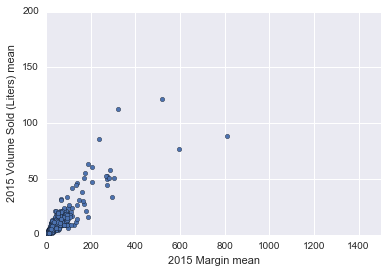

In [36]:
# Quick plot to check the computations
#plt.figure(figsize = (10,10))
sales.plot(kind='scatter', x="2015 Margin mean", y="2015 Volume Sold (Liters) mean");

plt.xlim(0, 1500)
plt.ylim(0, 200)

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

### Determine outliers, skew distribution of important variables (if any) (scipy.stats.skew)

### Determine correlations / causations in the data

In [37]:
new_sample.corr()

,Store Number,Category,Vendor Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
Store Number,1.000000,-0.013185,-0.001521,-0.067255,-0.078224,-0.078330,0.010448,-0.022477,-0.021218,-0.021208,-0.022401,-0.016145
Category,-0.013185,1.000000,0.089677,-0.016110,-0.005695,-0.005913,-0.001671,0.009339,-0.008392,-0.008382,0.009036,-0.003992
Vendor Number,-0.001521,0.089677,1.000000,0.030081,-0.001323,-0.001637,0.003284,-0.002874,0.001540,0.001544,-0.003211,0.003605
Bottle Volume (ml),-0.067255,-0.016110,0.030081,1.000000,0.331648,0.332543,-0.018690,0.082994,0.159434,0.159243,0.083508,-0.315272
State Bottle Cost,-0.078224,-0.005695,-0.001323,0.331648,1.000000,0.999960,-0.068569,0.144715,0.008386,0.008352,0.144026,0.720462
State Bottle Retail,-0.078330,-0.005913,-0.001637,0.332543,0.999960,1.000000,-0.068491,0.144848,0.008741,0.008707,0.144205,0.720010
Bottles Sold,0.010448,-0.001671,0.003284,-0.018690,-0.068569,-0.068491,1.000000,0.839944,0.905197,0.905233,0.840511,-0.065646
Sale (Dollars),-0.022477,0.009339,-0.002874,0.082994,0.144715,0.144848,0.839944,1.000000,0.862246,0.862262,0.999845,0.066216
Volume Sold (Liters),-0.021218,-0.008392,0.001540,0.159434,0.008386,0.008741,0.905197,0.862246,1.000000,1.000000,0.864882,-0.096946
Volume Sold (Gallons),-0.021208,-0.008382,0.001544,0.159243,0.008352,0.008707,0.905233,0.862262,1.000000,1.000000,0.864897,-0.096873


### Validate findings using statistical analysis (p-values, confidence intervals) as applicable (possibly use statsmodels, scipy, numpy, scikit learn)

In [38]:
new_sample.describe()

,Store Number,Category,Vendor Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
count,26926.000000,2.692600e+04,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000
mean,3591.643913,1.044156e+06,257.108965,924.699287,9.734851,14.617685,9.654757,125.230767,8.716631,2.302896,41.855490,17.927412
std,948.877904,5.146249e+04,140.467043,495.472421,6.789135,10.183027,22.797524,337.719415,25.511101,6.739300,113.029524,12.549354
min,2106.000000,1.011100e+06,10.000000,100.000000,0.890000,1.340000,1.000000,1.500000,0.100000,0.030000,0.000000,2.760000
25%,2605.000000,1.012200e+06,115.000000,750.000000,5.510000,8.270000,2.000000,30.000000,1.500000,0.400000,10.000000,9.800000
50%,3721.000000,1.031200e+06,260.000000,750.000000,8.000000,12.140000,6.000000,69.060000,5.250000,1.390000,23.040000,14.860000
75%,4392.000000,1.062310e+06,380.000000,1000.000000,11.800000,17.700000,12.000000,135.000000,10.500000,2.770000,45.000000,22.490000
max,9023.000000,1.701100e+06,978.000000,4800.000000,139.000000,208.500000,1320.000000,16542.000000,1320.000000,348.710000,5514.000000,278.000000


In [39]:
# tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
#pval = stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
#print 't-statistic = %6.3f pvalue = %6.4f' % (tt, pval)
#t-statistic =  0.391 pvalue = 0.6955 

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [40]:
# load numpy and pandas for data manipulation
# Link: https://www.datarobot.com/blog/ordinary-least-squares-in-python/
# b = (X'X)^-1(X'Y) Note: OLS Regression; see theta function below

import pandas as pd
import numpy as np
from scipy import linalg

# load statsmodels as alias ``sm``
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

In [41]:
sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,Price per Liter mean,Zip Code,County,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean
0,2106,CEDAR FALLS,13719.10,311.797727,17.116255,50613,Black Hawk,841.25,19.119318,104.096818
1,2113,GOWRIE,714.31,59.525833,21.144167,50543,Webster,44.25,3.687500,19.844167
2,2130,WATERLOO,19461.06,512.133158,18.515652,50703,Black Hawk,1060.20,27.900000,170.772632
3,2152,ROCKWELL,1273.23,106.102500,14.239444,50469,Cerro Gordo,79.25,6.604167,35.420833
4,2178,WAUKON,1832.32,87.253333,15.532918,52172,Allamakee,154.86,7.374286,29.391429


In [42]:
y = sales['2015 Volume Sold (Liters) mean']

In [43]:
X = sales['2015 Margin mean']

In [44]:
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

,const,2015 Margin mean
0,1.0,104.096818
1,1.0,19.844167
2,1.0,170.772632
3,1.0,35.420833
4,1.0,29.391429


### Complete linear regressions using scikit-learn or statsmodels and interpret your findings

In [45]:
theta = linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # X.T: Transpose of the matrix (i.e. 3x2 Matrix
# becomes 2x3 Matrix)
# For the Matrix to be inverted it has to be squared (i.e. 3x2 multiplied by 2x3 is a 3x3 or a
# square matrix)
theta

array([ 1.74576796,  0.17089438])

In [46]:
est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     2015 Volume Sold (Liters) mean   R-squared:                       0.759
Model:                                        OLS   Adj. R-squared:                  0.759
Method:                             Least Squares   F-statistic:                     4091.
Date:                            Tue, 28 Jun 2016   Prob (F-statistic):               0.00
Time:                                    20:44:36   Log-Likelihood:                -3710.3
No. Observations:                            1300   AIC:                             7425.
Df Residuals:                                1298   BIC:                             7435.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                1.7458      0.158     11.059      0.000         1.436     2.055
2015 Margin mean     0.1709      0.003     63.959      0.000         0.166     0.176
==============================================================================
Omnibus:                      911.982   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187671.106
Skew:                           2.216   Prob(JB):                         0.00
Kurtosis:                      61.695   Cond. No.                         80.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
est.predict(X)

array([ 19.5353287 ,   5.13702443,  30.92985018, ...,  34.07043908,
        52.30145106,  48.39993247])

In [48]:
est.params

const               1.745768
2015 Margin mean    0.170894
dtype: float64

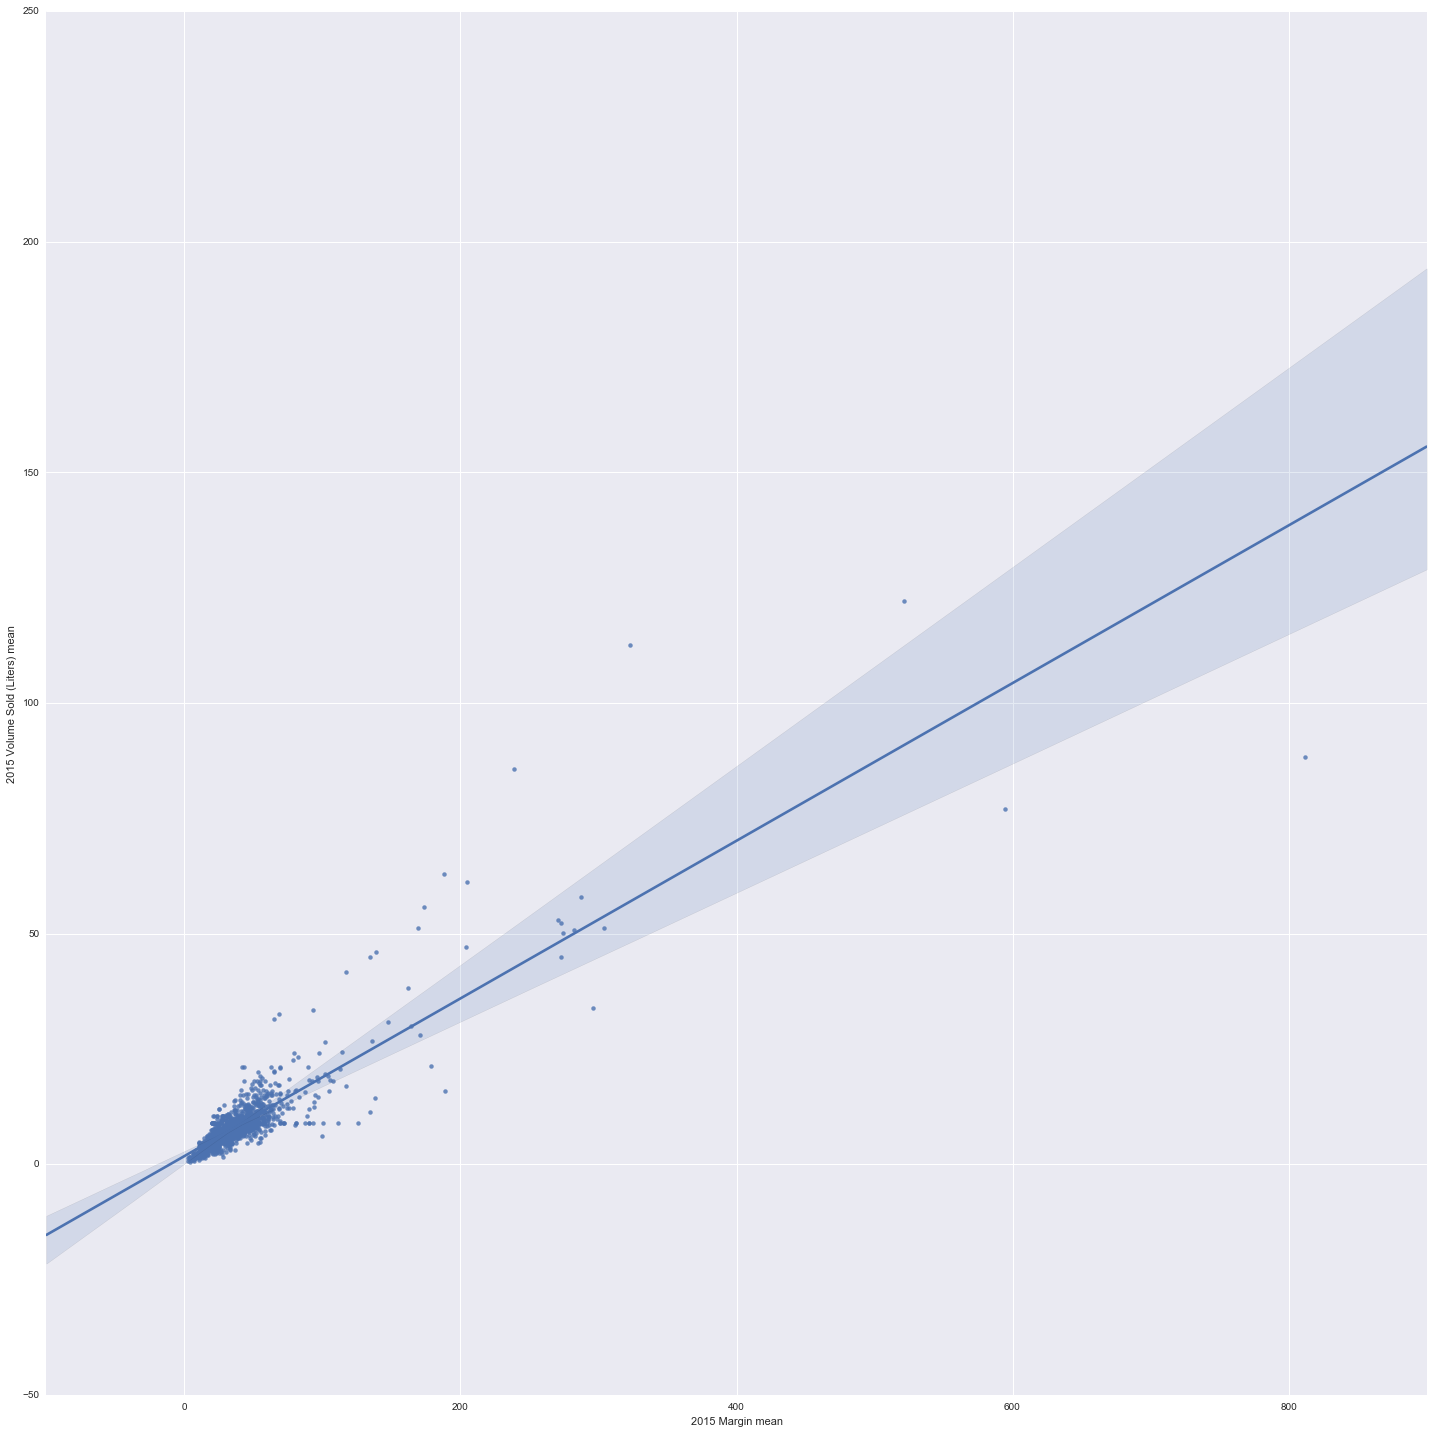

In [49]:
sns.lmplot(x='2015 Margin mean', y='2015 Volume Sold (Liters) mean', data=sales, size = 20)

### Calculate and plot predicted probabilities and/or present tables of results

In [50]:
xs = sales['2015 Margin mean']
ys = [x for x in xs] # true values
predictions = [2*x for x in xs]
print ys
print predictions

[104.09681818181819, 19.84416666666667, 170.77263157894737, 35.420833333333334, 29.391428571428555, 32.422097902097924, 65.583999999999989, 29.584736842105265, 33.766216216216222, 23.972941176470592, 55.303599999999996, 48.795999999999992, 37.49607142857144, 51.440882352941173, 23.729036144578313, 16.314999999999994, 69.278974358974367, 40.987499999999997, 64.22526315789473, 16.281666666666666, 15.863829787234041, 16.992222222222225, 57.290555555555557, 20.077804878048781, 30.512727272727275, 47.408000000000001, 14.030454545454546, 9.9199999999999999, 28.507460317460318, 40.90623076923076, 54.042875000000002, 38.555471698113216, 50.976923076923093, 34.681249999999999, 34.936507936507937, 55.017407407407418, 164.168115942029, 27.539999999999999, 20.48590909090909, 28.95860655737706, 29.066179775280908, 34.417857142857144, 36.871604938271602, 53.112941176470592, 29.214545454545451, 78.834285714285727, 43.385925925925932, 80.177096774193544, 25.15519230769231, 46.613243243243247, 75.96923

### Describe the bias-variance tradeoff of your model and errors metrics

### Evaluate model fit by using loss functions, including mean absolute error, mean squared error, and root mean squared error, or r-squared

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print "RMSE:", mean_squared_error(ys, predictions)
print "MAE:", mean_absolute_error(ys, predictions)

RMSE: 3490.31644401
MAE: 39.8312667553


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

### Create a Jupyter writeup hosted on GitHub that provides a dataset overview with visualizations, statistical analysis, data cleaning methodologies, and models

For this dataset my task was to recommend to a particular investor some locations in Iowa that would be ideal for opening up a liquor store. I used various cleaning methods and visualizations in order to understand the data and make it usable. For cleaning, I converted the "Date" column to datetime, removed any $ signs with the regex function, and changed numerical columns from object to float data types. For visualizations, I used matplotlib to plot scatter plots of numerical columns vs. Sale (Dollars). I also plotted county, city, and zip code by Sale (Dollars) to understand what areas had the best sales. I created a linear regression of the 2015 Margin Mean vs 2015 Volume Sold (Liters) mean and as expected it had a positive correlation. This showed that as the average volume sold increased so did the margin.

### Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps

# Bonus!

### Handle outliers, use regularization (Ridge & Lasso regressions)

### Brainstorm ways to improve your analysis; for example:
#### Add additional breakdowns and models, e.g. by month.
#### Recommend additional data that might improve your models
#### Can you think of other uses for the dataset? E.g healthcare / disease estimates

### Create a blog post of at least 500 words (and 1-2 graphics!) describing your data, analysis, and approach. Link to it in your Jupyter notebook.
